In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [17]:
!pip install sktime

     ---------------------------------------- 17.1/17.1 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 118.2/118.2 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from xgboost import XGBRegressor

pd.set_option('display.max_columns', 30)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df_new = pd.read_csv('전처리완료데이터.csv',encoding='cp949',index_col='Unnamed: 0')

In [4]:
df_new.drop(['풍향(16방위)_남',
       '풍향(16방위)_남남동', '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서',
       '풍향(16방위)_동', '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북',
       '풍향(16방위)_북동', '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서',
       '풍향(16방위)_서', '풍향(16방위)_서남서', '풍향(16방위)_서북서'],axis=1,inplace=True)

In [5]:
df_new

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스
0,2013-01-01 01:00:00,-2.2,NaN,3.7,95.0,1021.3,0.0,0.0,6.2,NaN,NaN,NaN,NaN,0.0,29.0,21.0,0.004,0.022,0.006
1,2013-01-01 02:00:00,-2.4,NaN,3.6,95.0,1021.2,0.0,0.0,6.2,NaN,NaN,NaN,NaN,0.0,45.0,21.0,0.004,0.012,0.006
2,2013-01-01 03:00:00,-2.7,NaN,3.6,95.0,1020.8,0.0,0.0,6.2,7.0,7.0,10.000000,1800.0,0.0,24.0,19.0,0.005,0.012,0.005
3,2013-01-01 04:00:00,-2.9,NaN,4.0,94.0,1020.0,0.0,0.0,6.2,7.0,7.0,10.000000,1800.0,0.0,24.0,19.0,0.006,0.009,0.005
4,2013-01-01 05:00:00,-2.4,NaN,3.0,91.0,1019.3,0.0,0.0,6.2,10.0,6.0,8.000000,1200.0,0.0,23.0,20.0,0.006,0.005,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87442,2022-12-31 19:00:00,3.2,0.2,2.3,60.0,1031.8,0.0,0.0,0.0,0.0,0.0,12.444444,3669.0,0.0,29.0,16.0,0.027,0.016,0.003
87443,2022-12-31 20:00:00,2.8,0.2,1.4,62.0,1031.4,0.0,0.0,0.0,0.0,0.0,12.333333,3269.0,0.0,32.0,22.0,0.018,0.022,0.002
87444,2022-12-31 21:00:00,2.2,0.2,0.9,63.0,1030.9,0.0,0.0,0.0,0.0,0.0,12.222222,3425.0,0.0,44.0,33.0,0.006,0.032,0.002
87445,2022-12-31 22:00:00,1.7,0.2,1.3,67.0,1031.2,0.0,0.0,0.0,0.0,0.0,12.111111,2682.0,0.0,46.0,37.0,0.005,0.030,0.002


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87447 entries, 0 to 87446
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   날짜           87447 non-null  object 
 1   기온(°C)       87447 non-null  float64
 2   강수량(mm)      87442 non-null  float64
 3   풍속(m/s)      87447 non-null  float64
 4   습도(%)        87447 non-null  float64
 5   해면기압(hPa)    87446 non-null  float64
 6   일조(hr)       87447 non-null  float64
 7   일사(MJ/m2)    87447 non-null  float64
 8   적설(cm)       87447 non-null  float64
 9   전운량(10분위)    87445 non-null  float64
 10  중하층운량(10분위)  87445 non-null  float64
 11  최저운고(100m )  87445 non-null  float64
 12  시정(10m)      87445 non-null  float64
 13  발전량          87447 non-null  float64
 14  PM10         87447 non-null  float64
 15  PM2.5        87447 non-null  float64
 16  O3           87447 non-null  float64
 17  이산화질소        87447 non-null  float64
 18  아황산가스        87447 non-null  float64
dtypes: f

## 시간 특징 추출

In [7]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np

# '날짜' 열을 datetime 형식으로 변환하고, 추가적인 시간 특징을 추출합니다.
df_new['날짜'] = pd.to_datetime(df_new['날짜'])
df_new['시간'] = df_new['날짜'].dt.hour
df_new['월'] = df_new['날짜'].dt.month
df_new['년'] = df_new['날짜'].dt.year

# 필요없는 열을 제거합니다.
# df_new.drop(columns=[ '날짜'], inplace=True)

# '시간'과 '월'을 순환 좌표로 변환합니다.
hours_in_day = 24
df_new['시간_sin'] = np.sin(2*np.pi*df_new['시간']/hours_in_day)
df_new['시간_cos'] = np.cos(2*np.pi*df_new['시간']/hours_in_day)

months_in_year = 12
df_new['월_sin'] = np.sin(2*np.pi*df_new['월']/months_in_year)
df_new['월_cos'] = np.cos(2*np.pi*df_new['월']/months_in_year)

# 원래의 '시간'과 '월' 열을 제거합니다.
df_new.drop(columns=['시간', '월'], inplace=True)

df_new.head()


,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),...,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos
0,2013-01-01 01:00:00,-2.2,NaN,3.7,95.0,1021.3,0.0,0.0,6.2,NaN,...,29.0,21.0,0.004,0.022,0.006,2013,0.258819,0.965926,0.5,0.866025
1,2013-01-01 02:00:00,-2.4,NaN,3.6,95.0,1021.2,0.0,0.0,6.2,NaN,...,45.0,21.0,0.004,0.012,0.006,2013,0.500000,0.866025,0.5,0.866025
2,2013-01-01 03:00:00,-2.7,NaN,3.6,95.0,1020.8,0.0,0.0,6.2,7.0,...,24.0,19.0,0.005,0.012,0.005,2013,0.707107,0.707107,0.5,0.866025
3,2013-01-01 04:00:00,-2.9,NaN,4.0,94.0,1020.0,0.0,0.0,6.2,7.0,...,24.0,19.0,0.006,0.009,0.005,2013,0.866025,0.500000,0.5,0.866025
4,2013-01-01 05:00:00,-2.4,NaN,3.0,91.0,1019.3,0.0,0.0,6.2,10.0,...,23.0,20.0,0.006,0.005,0.004,2013,0.965926,0.258819,0.5,0.866025


In [8]:
df_new['월_sin'].unique

<bound method Series.unique of 0        5.000000e-01
1        5.000000e-01
2        5.000000e-01
3        5.000000e-01
4        5.000000e-01
             ...     
87442   -2.449294e-16
87443   -2.449294e-16
87444   -2.449294e-16
87445   -2.449294e-16
87446   -2.449294e-16
Name: 월_sin, Length: 87447, dtype: float64>

In [9]:
df_new['시간_cos'].head(24)

0     9.659258e-01
1     8.660254e-01
2     7.071068e-01
3     5.000000e-01
4     2.588190e-01
5     6.123234e-17
6    -2.588190e-01
7    -5.000000e-01
8    -7.071068e-01
9    -8.660254e-01
10   -9.659258e-01
11   -1.000000e+00
12   -9.659258e-01
13   -8.660254e-01
14   -7.071068e-01
15   -5.000000e-01
16   -2.588190e-01
17   -1.836970e-16
18    2.588190e-01
19    5.000000e-01
20    7.071068e-01
21    8.660254e-01
22    9.659258e-01
23    1.000000e+00
Name: 시간_cos, dtype: float64

In [10]:
df_new["날짜"] = pd.to_datetime(df_new["날짜"])

# 6:00 ~ 20:00 범위의 데이터만 추출하여 새로운 데이터프레임 생성
df_new = df_new.loc[(df_new["날짜"].dt.hour >= 6) & (df_new["날짜"].dt.hour <= 20)]

In [11]:
df_new.head()

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),...,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos
5,2013-01-01 06:00:00,-2.2,0.000000,4.5,95.0,1018.7,0.0,0.00,6.2,10.0,...,26.0,23.000000,0.007,0.006,0.004,2013,1.000000,6.123234e-17,0.5,0.866025
6,2013-01-01 07:00:00,-1.7,0.000000,5.0,95.0,1018.6,0.0,0.00,6.2,10.0,...,26.0,20.586375,0.006,0.010,0.004,2013,0.965926,-2.588190e-01,0.5,0.866025
7,2013-01-01 08:00:00,-0.4,0.000000,3.2,89.0,1018.9,0.0,0.00,6.2,10.0,...,30.0,24.000000,0.006,0.011,0.004,2013,0.866025,-5.000000e-01,0.5,0.866025
8,2013-01-01 09:00:00,2.6,0.000000,6.0,91.0,1019.6,0.0,0.03,4.9,10.0,...,28.0,23.000000,0.005,0.010,0.004,2013,0.707107,-7.071068e-01,0.5,0.866025
9,2013-01-01 10:00:00,4.2,0.033333,5.8,82.0,1019.9,0.7,0.57,3.7,7.0,...,29.0,27.000000,0.007,0.006,0.005,2013,0.500000,-8.660254e-01,0.5,0.866025


In [12]:
df_new.columns

Index(['날짜', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )',
       '시정(10m)', '발전량', 'PM10', 'PM2.5', 'O3', '이산화질소', '아황산가스', '년',
       '시간_sin', '시간_cos', '월_sin', '월_cos'],
      dtype='object')

In [13]:
data = df_new

In [21]:
# 사용하지 않는 칼럼 삭제
data = data.drop(columns=["날짜","년"])

# 데이터 분할: 70%를 학습 데이터로, 30%를 검증 데이터로 사용합니다.
from sklearn.model_selection import train_test_split

train, val = train_test_split(data, test_size=0.3, random_state=42)

# 데이터에서 타겟 변수를 분리합니다.
target = '발전량'
features = data.columns.drop(target)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape


((38262, 21), (38262,), (16399, 21), (16399,))

In [22]:
data

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,시간_sin,시간_cos,월_sin,월_cos
5,-2.2,0.000000,4.5,95.0,1018.7,0.0,0.00,6.2,10.0,6.0,10.000000,1500.0,0.00,26.0,23.000000,0.007,0.006,0.004,1.000000,6.123234e-17,5.000000e-01,0.866025
6,-1.7,0.000000,5.0,95.0,1018.6,0.0,0.00,6.2,10.0,6.0,10.000000,1500.0,0.00,26.0,20.586375,0.006,0.010,0.004,0.965926,-2.588190e-01,5.000000e-01,0.866025
7,-0.4,0.000000,3.2,89.0,1018.9,0.0,0.00,6.2,10.0,7.0,9.000000,1500.0,0.00,30.0,24.000000,0.006,0.011,0.004,0.866025,-5.000000e-01,5.000000e-01,0.866025
8,2.6,0.000000,6.0,91.0,1019.6,0.0,0.03,4.9,10.0,7.0,8.000000,1300.0,20.16,28.0,23.000000,0.005,0.010,0.004,0.707107,-7.071068e-01,5.000000e-01,0.866025
9,4.2,0.033333,5.8,82.0,1019.9,0.7,0.57,3.7,7.0,7.0,9.000000,1300.0,106.80,29.0,27.000000,0.007,0.006,0.005,0.500000,-8.660254e-01,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87439,4.9,0.200000,5.4,51.0,1031.1,1.0,1.15,0.0,0.0,0.0,12.777778,4224.0,428.16,28.0,18.000000,0.039,0.009,0.002,-0.866025,-5.000000e-01,-2.449294e-16,1.000000
87440,4.3,0.200000,5.0,53.0,1031.0,1.0,0.54,0.0,0.0,0.0,12.666667,4290.0,53.64,26.0,20.000000,0.035,0.013,0.002,-0.965926,-2.588190e-01,-2.449294e-16,1.000000
87441,3.7,0.200000,2.8,57.0,1031.1,0.3,0.05,0.0,0.0,0.0,12.555556,3775.0,5.76,32.0,19.000000,0.029,0.018,0.002,-1.000000,-1.836970e-16,-2.449294e-16,1.000000
87442,3.2,0.200000,2.3,60.0,1031.8,0.0,0.00,0.0,0.0,0.0,12.444444,3669.0,0.00,29.0,16.000000,0.027,0.016,0.003,-0.965926,2.588190e-01,-2.449294e-16,1.000000


In [23]:
# 특성 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 목표 변수에 대해 상위 10% 및 하위 10%에 해당하는 값 찾기
y_train_sorted = y_train.sort_values()
lower = y_train_sorted.quantile(0.1)
upper = y_train_sorted.quantile(0.9)

# 타겟 변수를 상위 10%, 중간 80%, 하위 10%로 분류
y_train_classified = pd.cut(y_train, bins=[-float('inf'), lower, upper, float('inf')], labels=[0, 1, 2])
y_val_classified = pd.cut(y_val, bins=[-float('inf'), lower, upper, float('inf')], labels=[0, 1, 2])

y_train_classified.value_counts(), y_val_classified.value_counts()

(1    27398
 0     7039
 2     3825
 Name: 발전량, dtype: int64,
 1    11762
 0     2980
 2     1657
 Name: 발전량, dtype: int64)

In [24]:
# 분위수 회귀 모델링을 위해 Gradient Boosting Classifier 사용
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train_classified)

# 예측
train_pred = model.predict(X_train_scaled)
val_pred = model.predict(X_val_scaled)

# 모델 성능 평가
print("Training Classification Report:")
print(classification_report(y_train_classified, train_pred))

print("Validation Classification Report:")
print(classification_report(y_val_classified, val_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7039
           1       0.95      0.97      0.96     27398
           2       0.82      0.78      0.80      3825

    accuracy                           0.94     38262
   macro avg       0.91      0.89      0.90     38262
weighted avg       0.94      0.94      0.94     38262

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2980
           1       0.95      0.96      0.96     11762
           2       0.81      0.78      0.79      1657

    accuracy                           0.93     16399
   macro avg       0.90      0.88      0.89     16399
weighted avg       0.93      0.93      0.93     16399



# IForest 쓰기전

In [27]:
test_data = df_new[43830:]
data = df_new[:43830]

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 사용하지 않는 칼럼 삭제
data = data.drop(columns=["날짜"])

# 데이터 분할: 80%를 학습 데이터로, 20%를 검증 데이터로 사용합니다.
train, val = train_test_split(data, test_size=0.2, random_state=42)

# 데이터에서 타겟 변수를 분리합니다.
target = '발전량'
features = data.columns.drop(target)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 목표 변수에 대해 상위 10% 및 하위 10%에 해당하는 값 찾기
y_train_sorted = y_train.sort_values()
lower = y_train_sorted.quantile(0.1)
upper = y_train_sorted.quantile(0.9)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, lower, upper


((35064, 22), (35064,), (8766, 22), (8766,), 0.0, 1023.8040000000001)

In [31]:
# Gradient Boosting Regressor를 사용하여 분위수 예측
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 상위 10%와 하위 10%에 대한 분위수 예측 모델을 각각 생성
model_upper = GradientBoostingRegressor(loss='quantile', alpha=0.9, random_state=42)
model_lower = GradientBoostingRegressor(loss='quantile', alpha=0.1, random_state=42)
model = GradientBoostingRegressor(loss='ls', random_state=42)


# 모델 학습
model_upper.fit(X_train_scaled, y_train)
model_lower.fit(X_train_scaled, y_train)
model.fit(X_train_scaled, y_train)

# 예측
train_pred_upper = model_upper.predict(X_train_scaled)
train_pred_lower = model_lower.predict(X_train_scaled)
train_pred = model.predict(X_train_scaled)

val_pred_upper = model_upper.predict(X_val_scaled)
val_pred_lower = model_lower.predict(X_val_scaled)
val_pred = model.predict(X_val_scaled)

# 성능 평가(MAE, RMSE)
train_mae_upper = mean_absolute_error(y_train, train_pred_upper)
train_rmse_upper = mean_squared_error(y_train, train_pred_upper, squared=False)

train_mae_lower = mean_absolute_error(y_train, train_pred_lower)
train_rmse_lower = mean_squared_error(y_train, train_pred_lower, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)

val_mae_upper = mean_absolute_error(y_val, val_pred_upper)
val_rmse_upper = mean_squared_error(y_val, val_pred_upper, squared=False)

val_mae_lower = mean_absolute_error(y_val, val_pred_lower)
val_rmse_lower = mean_squared_error(y_val, val_pred_lower, squared=False)

val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = mean_squared_error(y_val, val_pred, squared=False)

In [32]:
print("train & val에 대한 성능 : ")
print()
print("train_mae_upper : ",train_mae)
print("train_rmse_upper : ",train_rmse)
print("val_mae_upper : ",val_mae)
print("val_rmse_upper : ",val_rmse)
print()
print("train_mae_upper : ",train_mae_upper)
print("train_rmse_upper : ",train_rmse_upper)
print("val_mae_upper : ",val_mae_upper)
print("val_rmse_upper : ",val_rmse_upper)
print()
print("train_mae_lower : ",train_mae_lower)
print("train_rmse_lower : ",train_rmse_lower)
print("val_mae_lower : ",val_mae_lower)
print("val_rmse_lower : ",val_rmse_lower)

train & val에 대한 성능 : 

train_mae_upper :  58.56206257895809
train_rmse_upper :  102.88556790801415
val_mae_upper :  61.33016609841341
val_rmse_upper :  109.92143284198401

train_mae_upper :  102.96266667410832
train_rmse_upper :  165.42087576958696
val_mae_upper :  105.70056450696205
val_rmse_upper :  170.25695179201958

train_mae_lower :  122.44861224557219
train_rmse_lower :  195.04181134817577
val_mae_lower :  123.90196590625634
val_rmse_lower :  197.00859321301044


In [33]:
test_data = test_data.drop(columns=["날짜"])

# 데이터에서 타겟 변수를 분리합니다.
target = '발전량'
features = test_data.columns.drop(target)

# 테스트 데이터셋에서 타겟 변수를 분리합니다.
X_test = test_data[features]
y_test = test_data[target]

# 특성 스케일링: scaler는 학습 데이터셋에 fit_transform이 적용된 상태여야 합니다.
X_test_scaled = scaler.transform(X_test)

# 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행합니다.
# model_upper와 model_lower는 각각 학습 데이터셋에 fit이 적용된 상태여야 합니다.
test_pred_upper = model_upper.predict(X_test_scaled)
test_pred_lower = model_lower.predict(X_test_scaled)
test_pred = model.predict(X_test_scaled)

# 성능 평가(MAE, RMSE)
test_mae_upper = mean_absolute_error(y_test, test_pred_upper)
test_rmse_upper = mean_squared_error(y_test, test_pred_upper, squared=False)

test_mae_lower = mean_absolute_error(y_test, test_pred_lower)
test_rmse_lower = mean_squared_error(y_test, test_pred_lower, squared=False)

test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = mean_absolute_error(y_test, test_pred)

print("테스트 데이터셋에 대한 성능:")
print(f"기본 회귀 예측: MAE = {test_mae:.2f}, RMSE = {test_rmse:.2f}")
print(f"상위 10% 예측: MAE = {test_mae_upper:.2f}, RMSE = {test_rmse_upper:.2f}")
print(f"하위 10% 예측: MAE = {test_mae_lower:.2f}, RMSE = {test_rmse_lower:.2f}")


테스트 데이터셋에 대한 성능:
기본 회귀 예측: MAE = 66.01, RMSE = 66.01
상위 10% 예측: MAE = 133.17, RMSE = 206.32
하위 10% 예측: MAE = 112.93, RMSE = 180.43


In [34]:
test_data

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos
70132,-1.8,0.0,2.2,85.0,1027.7,0.0,0.00,3.0,8.0,8.0,6.000000,853.0,0.00,26.000000,25.00000,0.018,0.007,0.004,2021,1.000000,6.123234e-17,5.000000e-01,0.866025
70133,-2.2,0.0,2.4,85.0,1027.9,0.0,0.00,3.0,7.0,7.0,15.000000,1064.0,0.00,20.533871,17.69318,0.018,0.007,0.003,2021,0.965926,-2.588190e-01,5.000000e-01,0.866025
70134,-2.0,0.0,2.8,88.0,1027.5,0.0,0.01,3.0,7.0,7.0,12.000000,1177.0,0.00,22.000000,21.00000,0.015,0.010,0.003,2021,0.866025,-5.000000e-01,5.000000e-01,0.866025
70135,-1.5,0.0,2.8,88.0,1027.9,0.4,0.30,2.8,4.0,4.0,13.000000,1218.0,25.20,20.000000,18.00000,0.016,0.016,0.003,2021,0.707107,-7.071068e-01,5.000000e-01,0.866025
70136,0.5,0.0,2.1,79.0,1028.4,0.9,1.01,2.5,6.0,6.0,18.000000,1623.0,323.28,20.664459,18.26692,0.019,0.010,0.003,2021,0.500000,-8.660254e-01,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87439,4.9,0.2,5.4,51.0,1031.1,1.0,1.15,0.0,0.0,0.0,12.777778,4224.0,428.16,28.000000,18.00000,0.039,0.009,0.002,2022,-0.866025,-5.000000e-01,-2.449294e-16,1.000000
87440,4.3,0.2,5.0,53.0,1031.0,1.0,0.54,0.0,0.0,0.0,12.666667,4290.0,53.64,26.000000,20.00000,0.035,0.013,0.002,2022,-0.965926,-2.588190e-01,-2.449294e-16,1.000000
87441,3.7,0.2,2.8,57.0,1031.1,0.3,0.05,0.0,0.0,0.0,12.555556,3775.0,5.76,32.000000,19.00000,0.029,0.018,0.002,2022,-1.000000,-1.836970e-16,-2.449294e-16,1.000000
87442,3.2,0.2,2.3,60.0,1031.8,0.0,0.00,0.0,0.0,0.0,12.444444,3669.0,0.00,29.000000,16.00000,0.027,0.016,0.003,2022,-0.965926,2.588190e-01,-2.449294e-16,1.000000


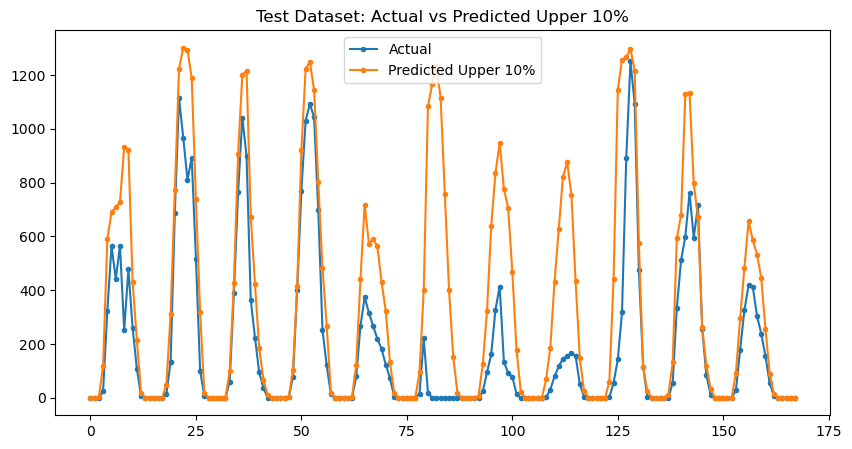

In [35]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_upper[:168], label='Predicted Upper 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Upper 10%')
plt.show()


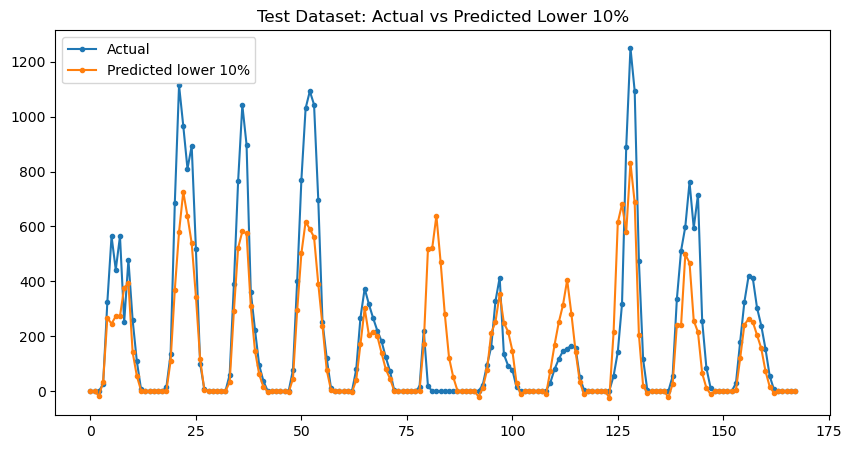

In [36]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_lower[:168], label='Predicted lower 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Lower 10%')
plt.show()

# ISOLATION TREE

In [38]:
# data = data.drop(columns=["날짜"])

# 타겟 변수를 분리합니다.
target = '발전량'
features = data.columns.drop(target)

X = data[features]
y = data[target]

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 이상치 탐지를 위해 Isolation Forest를 사용합니다.
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_scaled)

# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask], y[mask]

# 데이터를 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링 적용
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 상위 10%와 하위 10%에 대한 분위수 예측 모델을 각각 생성
model_upper = GradientBoostingRegressor(loss='quantile', alpha=0.9, random_state=42)
model_lower = GradientBoostingRegressor(loss='quantile', alpha=0.1, random_state=42)
model = GradientBoostingRegressor(loss='ls', random_state=42)


# 모델 학습
model_upper.fit(X_train_scaled, y_train)
model_lower.fit(X_train_scaled, y_train)
model.fit(X_train_scaled, y_train)

# 예측
train_pred_upper = model_upper.predict(X_train_scaled)
train_pred_lower = model_lower.predict(X_train_scaled)
train_pred = model.predict(X_train_scaled)

val_pred_upper = model_upper.predict(X_val_scaled)
val_pred_lower = model_lower.predict(X_val_scaled)
val_pred = model.predict(X_val_scaled)

# 성능 평가(MAE, RMSE)
train_mae_upper = mean_absolute_error(y_train, train_pred_upper)
train_rmse_upper = mean_squared_error(y_train, train_pred_upper, squared=False)

train_mae_lower = mean_absolute_error(y_train, train_pred_lower)
train_rmse_lower = mean_squared_error(y_train, train_pred_lower, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)

val_mae_upper = mean_absolute_error(y_val, val_pred_upper)
val_rmse_upper = mean_squared_error(y_val, val_pred_upper, squared=False)

val_mae_lower = mean_absolute_error(y_val, val_pred_lower)
val_rmse_lower = mean_squared_error(y_val, val_pred_lower, squared=False)

val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = mean_squared_error(y_val, val_pred, squared=False)

train_mae_upper, train_rmse_upper, train_mae_lower, train_rmse_lower, val_mae_upper, val_rmse_upper, val_mae_lower, val_rmse_lower


(104.79535547824192,
 166.96385471834495,
 131.18486918787409,
 206.19433933150324,
 105.01207191216896,
 166.50402360954524,
 129.34383331188866,
 202.7089212024382)

In [39]:
print("train & val에 대한 성능 : ")
print()
print("train_mae_upper : ",train_mae)
print("train_rmse_upper : ",train_rmse)
print("val_mae_upper : ",val_mae)
print("val_rmse_upper : ",val_rmse)
print()
print("train_mae_upper : ",train_mae_upper)
print("train_rmse_upper : ",train_rmse_upper)
print("val_mae_upper : ",val_mae_upper)
print("val_rmse_upper : ",val_rmse_upper)
print()
print("train_mae_lower : ",train_mae_lower)
print("train_rmse_lower : ",train_rmse_lower)
print("val_mae_lower : ",val_mae_lower)
print("val_rmse_lower : ",val_rmse_lower)

train & val에 대한 성능 : 

train_mae_upper :  60.172032495786276
train_rmse_upper :  105.2230650875424
val_mae_upper :  59.527983998689685
val_rmse_upper :  105.83245114089925

train_mae_upper :  104.79535547824192
train_rmse_upper :  166.96385471834495
val_mae_upper :  105.01207191216896
val_rmse_upper :  166.50402360954524

train_mae_lower :  131.18486918787409
train_rmse_lower :  206.19433933150324
val_mae_lower :  129.34383331188866
val_rmse_lower :  202.7089212024382


In [40]:
# test_data = test_data.drop(columns=["날짜"])

# 데이터에서 타겟 변수를 분리합니다.
target = '발전량'
features = test_data.columns.drop(target)

# 테스트 데이터셋에서 타겟 변수를 분리합니다.
X_test = test_data[features]
y_test = test_data[target]

# 특성 스케일링: scaler는 학습 데이터셋에 fit_transform이 적용된 상태여야 합니다.
X_test_scaled = scaler.transform(X_test)

# 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행합니다.
# model_upper와 model_lower는 각각 학습 데이터셋에 fit이 적용된 상태여야 합니다.
test_pred_upper = model_upper.predict(X_test_scaled)
test_pred_lower = model_lower.predict(X_test_scaled)
test_pred = model.predict(X_test_scaled)

# 성능 평가(MAE, RMSE)
test_mae_upper = mean_absolute_error(y_test, test_pred_upper)
test_rmse_upper = mean_squared_error(y_test, test_pred_upper, squared=False)

test_mae_lower = mean_absolute_error(y_test, test_pred_lower)
test_rmse_lower = mean_squared_error(y_test, test_pred_lower, squared=False)

test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = mean_absolute_error(y_test, test_pred)

print("테스트 데이터셋에 대한 성능:")
print(f"기본 회귀 예측: MAE = {test_mae:.2f}, RMSE = {test_rmse:.2f}")
print(f"상위 10% 예측: MAE = {test_mae_upper:.2f}, RMSE = {test_rmse_upper:.2f}")
print(f"하위 10% 예측: MAE = {test_mae_lower:.2f}, RMSE = {test_rmse_lower:.2f}")


테스트 데이터셋에 대한 성능:
기본 회귀 예측: MAE = 65.54, RMSE = 65.54
상위 10% 예측: MAE = 131.74, RMSE = 204.21
하위 10% 예측: MAE = 115.99, RMSE = 184.86


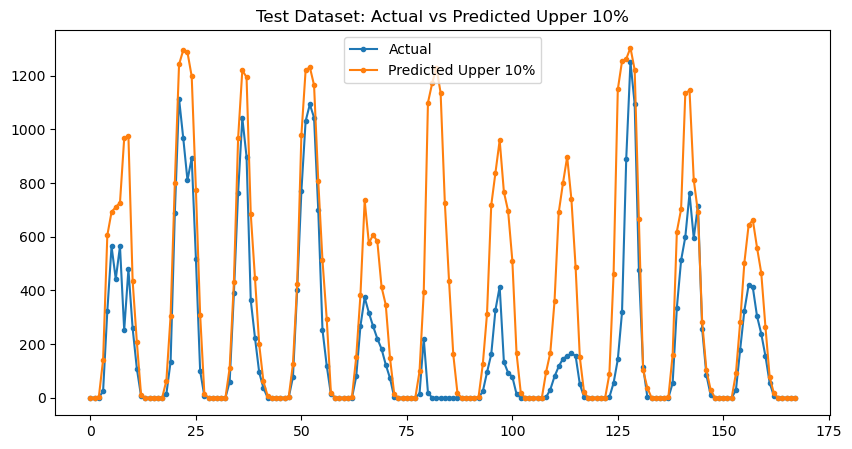

In [41]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_upper[:168], label='Predicted Upper 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Upper 10%')
plt.show()


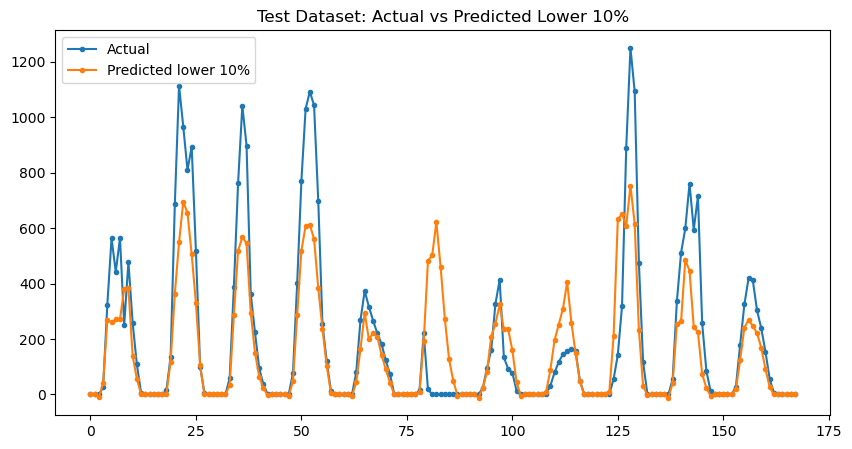

In [42]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_lower[:168], label='Predicted lower 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Lower 10%')
plt.show()

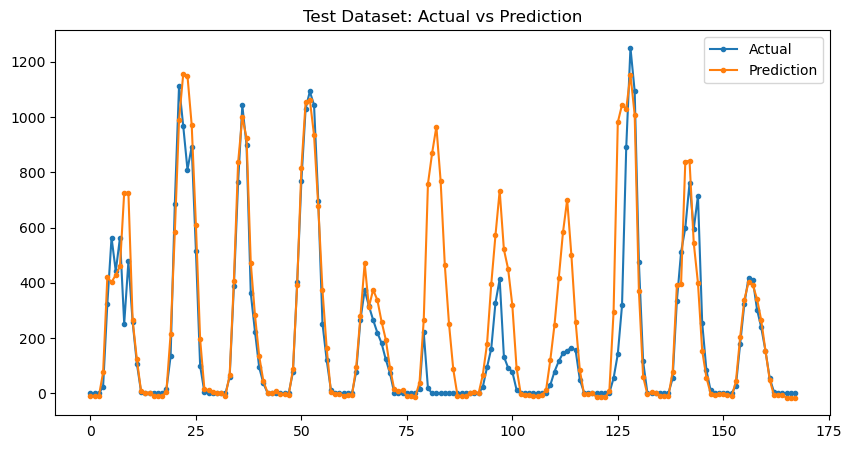

In [43]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred[:168], label='Prediction', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Prediction')
plt.show()

In [19]:
df_new.describe()

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos
count,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,54661.000000,5.466100e+04,5.466100e+04,5.466100e+04
mean,15.245943,0.477057,3.672401,73.506964,1016.590463,0.422037,0.908662,0.125190,5.501209,3.540919,16.071498,1557.822415,368.212995,38.719515,23.996501,0.035967,0.011287,0.003879,2017.490569,-0.122198,-4.557472e-01,-3.187606e-03,-3.282117e-03
std,9.500602,1.498659,2.279549,17.242254,8.220343,0.445676,0.931292,1.197522,3.696339,3.437479,13.808179,699.914965,395.930534,25.489132,16.210411,0.017506,0.007987,0.002207,2.867486,0.750988,4.619455e-01,7.054580e-01,7.087499e-01
min,-12.800000,0.000000,0.000000,13.000000,983.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.001000,0.001000,0.000000,2013.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,7.100000,0.000000,2.000000,61.000000,1010.000000,0.000000,0.060000,0.000000,2.000000,0.000000,9.000000,1100.000000,9.960000,22.000000,13.000000,0.023000,0.005307,0.002000,2015.000000,-0.866025,-8.660254e-01,-8.660254e-01,-8.660254e-01
50%,16.000000,0.073333,3.200000,74.000000,1016.700000,0.200000,0.590000,0.000000,6.000000,3.000000,10.000000,1800.000000,205.440000,33.000000,20.000000,0.035000,0.009000,0.003000,2017.000000,-0.258819,-5.000000e-01,-2.449294e-16,-1.836970e-16
75%,23.400000,0.300000,4.900000,88.000000,1023.100000,1.000000,1.570000,0.000000,9.000000,7.000000,18.000000,2000.000000,670.320000,49.000000,31.988148,0.047000,0.015000,0.004554,2020.000000,0.707107,-1.836970e-16,5.000000e-01,8.660254e-01
max,36.500000,42.400000,17.700000,100.000000,1038.800000,1.000000,3.720000,33.000000,10.000000,10.000000,76.000000,5000.000000,1474.920000,322.000000,191.000000,0.114000,0.072000,0.037000,2022.000000,1.000000,5.000000e-01,1.000000e+00,1.000000e+00


# PCA & Clustering

In [14]:
df_pca = df_new.copy()

In [125]:
df_pca.drop(['발전량','날짜','년'],axis=1,inplace=True)

In [126]:
# df_pca.drop(['풍속 QC플래그', '강수량 QC플래그','기온 QC플래그',
#        '풍향 QC플래그','습도 QC플래그', '현지기압 QC플래그','해면기압 QC플래그',
#             '지면온도 QC플래그','일조 QC플래그','일사 QC플래그'],axis=1,inplace=True)

In [127]:
df_pca.columns

Index(['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )',
       '시정(10m)', 'PM10', 'PM2.5', 'O3', '이산화질소', '아황산가스', '시간_sin', '시간_cos',
       '월_sin', '월_cos'],
      dtype='object')

In [128]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54661 entries, 5 to 87443
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기온(°C)       54661 non-null  float64
 1   강수량(mm)      54661 non-null  float64
 2   풍속(m/s)      54661 non-null  float64
 3   습도(%)        54661 non-null  float64
 4   해면기압(hPa)    54661 non-null  float64
 5   일조(hr)       54661 non-null  float64
 6   일사(MJ/m2)    54661 non-null  float64
 7   적설(cm)       54661 non-null  float64
 8   전운량(10분위)    54661 non-null  float64
 9   중하층운량(10분위)  54661 non-null  float64
 10  최저운고(100m )  54661 non-null  float64
 11  시정(10m)      54661 non-null  float64
 12  PM10         54661 non-null  float64
 13  PM2.5        54661 non-null  float64
 14  O3           54661 non-null  float64
 15  이산화질소        54661 non-null  float64
 16  아황산가스        54661 non-null  float64
 17  시간_sin       54661 non-null  float64
 18  시간_cos       54661 non-null  float64
 19  월_si

In [52]:
# df_pca.drop(['이슬점온도(°C)'],axis=1,inplace=True)
# df_pca.drop(['증기압(hPa)'],axis=1,inplace=True)
# df_pca.drop(['지면온도(°C)'],axis=1,inplace=True)

## 2차원으로 차원축소

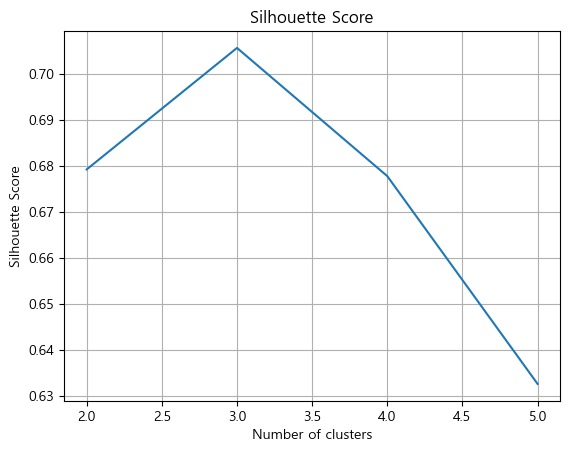

In [133]:
from sklearn.metrics import silhouette_score

silhouette = []
K = range(2,6)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    silhouette.append(silhouette_score(df_pca, kmeans.labels_))

plt.plot(K, silhouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# 표준화
scaler = StandardScaler()
df_std = scaler.fit_transform(df_pca)

# PCA 모델링
pca = PCA(n_components=2)
pca.fit(df_std)

# 주성분(PC) 산출
pcs = pca.transform(df_std)
pc_df = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
pcs_scaled = min_max_scaler.fit_transform(pc_df)

# 결과 출력
pcs_scaled


array([[ 0.53593304, -0.072273  ],
       [ 0.53117002, -0.05420876],
       [ 0.52930216, -0.03497338],
       ...,
       [-0.13020558,  0.1946529 ],
       [-0.03500955,  0.17048419],
       [ 0.08653759,  0.19591702]])

In [67]:
pcs_scaled = pd.DataFrame(data=pcs_scaled, columns=['PC1', 'PC2'])

In [68]:
pcs_scaled

,PC1,PC2
0,0.535933,-0.072273
1,0.531170,-0.054209
2,0.529302,-0.034973
3,0.469676,-0.064741
4,0.192714,0.013669
...,...,...
54656,-0.522065,0.196897
54657,-0.415690,0.210209
54658,-0.130206,0.194653
54659,-0.035010,0.170484


C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


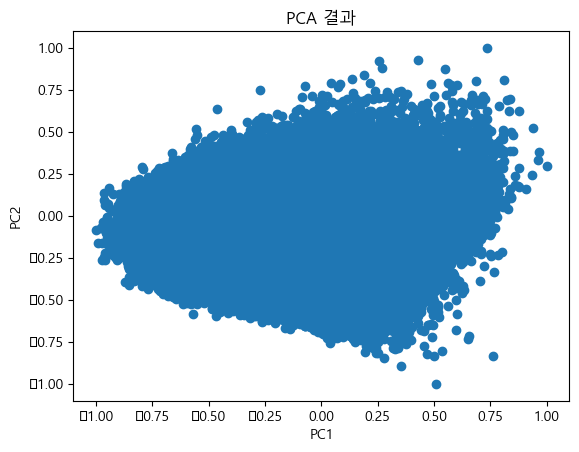

In [69]:
plt.scatter(pcs_scaled['PC1'], pcs_scaled['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 결과')


plt.show()

In [70]:
from matplotlib import font_manager, rc

# 폰트 경로와 이름을 지정
font_path = 'C:/Windows/Fonts/malgun.ttf' # 나눔글꼴 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 폰트 설정
rc('font', family=font_name)

## 주성분을 이용한 feature importance 시각화


C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


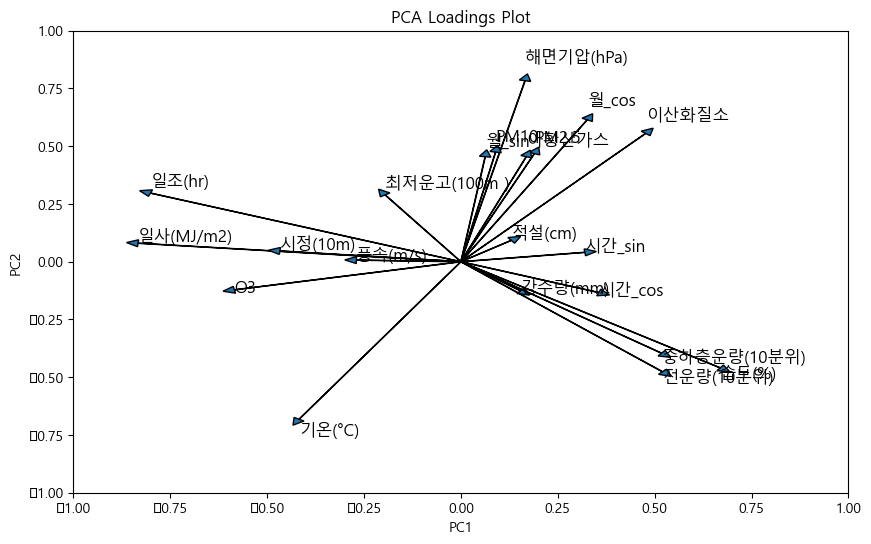

In [71]:
# 주성분을 이용한 feature importance 시각화
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = df_pca.columns.values

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.03, head_length=0.03)
    ax.annotate(feature, (loadings[i, 0], loadings[i, 1]),xytext=(loadings[i, 0], loadings[i, 1] * 1.1), fontsize=12)
    
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA Loadings Plot")

plt.show()

## 다중공선성

In [72]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위해 상수항(intercept) 열 추가
df_pca['intercept'] = 1

# 각 피처의 VIF 계산
vif = pd.DataFrame()
vif['Feature'] = df_pca.columns
vif['VIF'] = [variance_inflation_factor(df_pca.values, i) for i in range(df_pca.shape[1])]

# 결과 출력
print(vif)


        Feature           VIF
0        기온(°C)     10.987128
1       강수량(mm)      1.058991
2       풍속(m/s)      1.677905
3         습도(%)      2.938246
4     해면기압(hPa)      4.463292
5        일조(hr)      3.897562
6     일사(MJ/m2)      6.424634
7        적설(cm)      1.088574
8     전운량(10분위)      3.029316
9   중하층운량(10분위)      2.461931
10  최저운고(100m )      1.280458
11      시정(10m)      1.733083
12         PM10      3.747963
13        PM2.5      3.969008
14           O3      1.972802
15        이산화질소      2.333728
16        아황산가스      1.487994
17       시간_sin      2.014852
18       시간_cos      3.417208
19        월_sin      4.390046
20        월_cos      5.941480
21    intercept  70562.073239


- PCA와 다중공선성을 통해 알아낸점 : 이슬점온도를 드롭하자

# Clustering

In [73]:
features = ['PC1', 'PC2']
X = pcs_scaled[features]

### k=3

In [74]:
X

,PC1,PC2
0,0.535933,-0.072273
1,0.531170,-0.054209
2,0.529302,-0.034973
3,0.469676,-0.064741
4,0.192714,0.013669
...,...,...
54656,-0.522065,0.196897
54657,-0.415690,0.210209
54658,-0.130206,0.194653
54659,-0.035010,0.170484


In [75]:
from sklearn.cluster import KMeans

In [76]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [77]:
kmeans.fit(X)
pcs_scaled['cluster'] = kmeans.labels_
# 클러스터별로 데이터 분할
cluster0 = pcs_scaled[pcs_scaled['cluster'] == 0]
cluster1 = pcs_scaled[pcs_scaled['cluster'] == 1]
cluster2 = pcs_scaled[pcs_scaled['cluster'] == 2]

In [78]:
pcs_scaled['cluster'].value_counts()

0    20010
2    17542
1    17109
Name: cluster, dtype: int64

C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


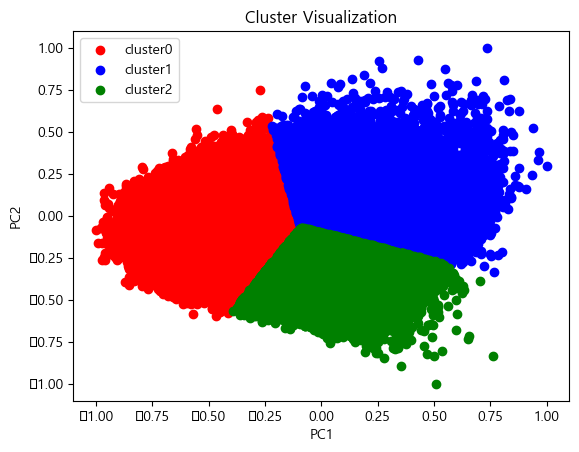

In [79]:
# 클러스터별 데이터 시각화
plt.scatter(cluster0['PC1'], cluster0['PC2'], color='red',label='cluster0')
plt.scatter(cluster1['PC1'], cluster1['PC2'], color='blue',label='cluster1')
plt.scatter(cluster2['PC1'], cluster2['PC2'], color='green',label='cluster2')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Cluster Visualization')

plt.show()

In [81]:
cluster0

,PC1,PC2,cluster
36,-0.212681,0.285093,0
37,-0.251353,0.243622,0
38,-0.201897,0.240141,0
51,-0.236557,0.287259,0
52,-0.291914,0.246709,0
...,...,...,...
54653,-0.327025,0.112876,0
54654,-0.515189,0.153560,0
54655,-0.557751,0.221394,0
54656,-0.522065,0.196897,0


In [82]:
df_pca

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),PM10,PM2.5,O3,이산화질소,아황산가스,시간_sin,시간_cos,월_sin,월_cos,intercept
5,-2.2,0.000000,4.5,95.0,1018.7,0.0,0.00,6.2,10.0,6.0,10.000000,1500.0,26.0,23.000000,0.007,0.006,0.004,1.000000,6.123234e-17,5.000000e-01,0.866025,1
6,-1.7,0.000000,5.0,95.0,1018.6,0.0,0.00,6.2,10.0,6.0,10.000000,1500.0,26.0,20.586375,0.006,0.010,0.004,0.965926,-2.588190e-01,5.000000e-01,0.866025,1
7,-0.4,0.000000,3.2,89.0,1018.9,0.0,0.00,6.2,10.0,7.0,9.000000,1500.0,30.0,24.000000,0.006,0.011,0.004,0.866025,-5.000000e-01,5.000000e-01,0.866025,1
8,2.6,0.000000,6.0,91.0,1019.6,0.0,0.03,4.9,10.0,7.0,8.000000,1300.0,28.0,23.000000,0.005,0.010,0.004,0.707107,-7.071068e-01,5.000000e-01,0.866025,1
9,4.2,0.033333,5.8,82.0,1019.9,0.7,0.57,3.7,7.0,7.0,9.000000,1300.0,29.0,27.000000,0.007,0.006,0.005,0.500000,-8.660254e-01,5.000000e-01,0.866025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87439,4.9,0.200000,5.4,51.0,1031.1,1.0,1.15,0.0,0.0,0.0,12.777778,4224.0,28.0,18.000000,0.039,0.009,0.002,-0.866025,-5.000000e-01,-2.449294e-16,1.000000,1
87440,4.3,0.200000,5.0,53.0,1031.0,1.0,0.54,0.0,0.0,0.0,12.666667,4290.0,26.0,20.000000,0.035,0.013,0.002,-0.965926,-2.588190e-01,-2.449294e-16,1.000000,1
87441,3.7,0.200000,2.8,57.0,1031.1,0.3,0.05,0.0,0.0,0.0,12.555556,3775.0,32.0,19.000000,0.029,0.018,0.002,-1.000000,-1.836970e-16,-2.449294e-16,1.000000,1
87442,3.2,0.200000,2.3,60.0,1031.8,0.0,0.00,0.0,0.0,0.0,12.444444,3669.0,29.0,16.000000,0.027,0.016,0.003,-0.965926,2.588190e-01,-2.449294e-16,1.000000,1


# 클러스터 3개

In [76]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [93]:
kmeans.fit(X)
df_new['cluster'] = kmeans.labels_
# 클러스터별로 데이터 분할
cluster0 = df_new[df_new['cluster'] == 0]
cluster1 = df_new[df_new['cluster'] == 1]
cluster2 = df_new[df_new['cluster'] == 2]

C:\Users\ebdl\AppData\Local\Temp\ipykernel_44856\1638393536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster'] = kmeans.labels_


클러스터0 : 일조, 일사, 시정, 풍속, O3, 최저운고, 기온 <br>
클러스터1 : 해면기압, 이산화질소, PM2.5, PM10, 아황산가스, 월sin, 월cos, 적설<br>
클러스터2 : 기온, 전운량, 습도, 중하층운량 

In [94]:
cluster0

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
59,2013-01-03 12:00:00,-2.7,0.0,3.9,67.0,1037.2,1.0,1.71,0.0,3.0,0.0,17.333333,2300.0,1149.84,24.0,17.000000,0.008,0.008,0.004,2013,1.224647e-16,-1.000000,5.000000e-01,0.866025,0
60,2013-01-03 13:00:00,-2.8,0.0,5.6,63.0,1036.8,1.0,1.68,0.0,5.0,0.0,20.444444,2300.0,1104.60,22.0,18.000000,0.008,0.005,0.003,2013,-2.588190e-01,-0.965926,5.000000e-01,0.866025,0
61,2013-01-03 14:00:00,-3.1,0.0,5.7,63.0,1036.3,1.0,1.32,0.0,7.0,0.0,23.555556,2300.0,1088.52,25.0,25.000000,0.010,0.005,0.003,2013,-5.000000e-01,-0.866025,5.000000e-01,0.866025,0
83,2013-01-04 12:00:00,-3.0,0.0,5.6,68.0,1032.8,1.0,1.69,0.0,0.0,0.0,10.000000,2000.0,1191.24,26.0,13.994836,0.006,0.006,0.006,2013,1.224647e-16,-1.000000,5.000000e-01,0.866025,0
84,2013-01-04 13:00:00,-1.9,0.0,5.2,65.0,1031.1,1.0,1.87,0.0,0.0,0.0,10.000000,2000.0,1357.08,23.0,20.000000,0.008,0.005,0.004,2013,-2.588190e-01,-0.965926,5.000000e-01,0.866025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87436,2022-12-31 13:00:00,4.2,0.2,5.4,57.0,1031.8,0.6,1.53,0.0,4.0,4.0,10.000000,3442.0,1288.80,38.0,23.000000,0.038,0.005,0.002,2022,-2.588190e-01,-0.965926,-2.449294e-16,1.000000,0
87437,2022-12-31 14:00:00,5.1,0.2,5.4,51.0,1031.2,0.9,1.82,0.0,2.0,2.0,13.000000,4031.0,963.24,27.0,16.000000,0.037,0.007,0.002,2022,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,0
87438,2022-12-31 15:00:00,5.1,0.2,5.7,51.0,1031.0,1.0,1.65,0.0,0.0,0.0,12.888889,4146.0,708.84,34.0,20.000000,0.038,0.010,0.002,2022,-7.071068e-01,-0.707107,-2.449294e-16,1.000000,0
87439,2022-12-31 16:00:00,4.9,0.2,5.4,51.0,1031.1,1.0,1.15,0.0,0.0,0.0,12.777778,4224.0,428.16,28.0,18.000000,0.039,0.009,0.002,2022,-8.660254e-01,-0.500000,-2.449294e-16,1.000000,0


In [95]:
cluster1

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
5,2013-01-01 06:00:00,-2.2,0.000000,4.5,95.0,1018.7,0.0,0.00,6.2,10.0,6.0,10.000000,1500.0,0.00,26.0,23.000000,0.007,0.006,0.004,2013,1.000000,6.123234e-17,5.000000e-01,0.866025,1
6,2013-01-01 07:00:00,-1.7,0.000000,5.0,95.0,1018.6,0.0,0.00,6.2,10.0,6.0,10.000000,1500.0,0.00,26.0,20.586375,0.006,0.010,0.004,2013,0.965926,-2.588190e-01,5.000000e-01,0.866025,1
7,2013-01-01 08:00:00,-0.4,0.000000,3.2,89.0,1018.9,0.0,0.00,6.2,10.0,7.0,9.000000,1500.0,0.00,30.0,24.000000,0.006,0.011,0.004,2013,0.866025,-5.000000e-01,5.000000e-01,0.866025,1
8,2013-01-01 09:00:00,2.6,0.000000,6.0,91.0,1019.6,0.0,0.03,4.9,10.0,7.0,8.000000,1300.0,20.16,28.0,23.000000,0.005,0.010,0.004,2013,0.707107,-7.071068e-01,5.000000e-01,0.866025,1
9,2013-01-01 10:00:00,4.2,0.033333,5.8,82.0,1019.9,0.7,0.57,3.7,7.0,7.0,9.000000,1300.0,106.80,29.0,27.000000,0.007,0.006,0.005,2013,0.500000,-8.660254e-01,5.000000e-01,0.866025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87432,2022-12-31 09:00:00,0.1,0.200000,0.9,85.0,1033.4,0.7,0.37,0.0,0.0,0.0,10.000000,1295.0,51.72,32.0,29.000000,0.004,0.023,0.002,2022,0.707107,-7.071068e-01,-2.449294e-16,1.000000,1
87433,2022-12-31 10:00:00,1.7,0.200000,0.4,75.0,1033.7,1.0,1.04,0.0,0.0,0.0,10.000000,1534.0,344.04,45.0,34.000000,0.014,0.018,0.002,2022,0.500000,-8.660254e-01,-2.449294e-16,1.000000,1
87441,2022-12-31 18:00:00,3.7,0.200000,2.8,57.0,1031.1,0.3,0.05,0.0,0.0,0.0,12.555556,3775.0,5.76,32.0,19.000000,0.029,0.018,0.002,2022,-1.000000,-1.836970e-16,-2.449294e-16,1.000000,1
87442,2022-12-31 19:00:00,3.2,0.200000,2.3,60.0,1031.8,0.0,0.00,0.0,0.0,0.0,12.444444,3669.0,0.00,29.0,16.000000,0.027,0.016,0.003,2022,-0.965926,2.588190e-01,-2.449294e-16,1.000000,1


In [96]:
cluster2

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
749,2013-02-01 06:00:00,11.8,4.900000,4.1,99.0,1019.4,0.0,0.00,0.0,10.0,7.0,8.0,500.0,0.00,11.0,11.0,0.051,0.006,0.004,2013,1.000000,6.123234e-17,8.660254e-01,0.5,2
750,2013-02-01 07:00:00,12.0,6.866667,4.6,99.0,1019.0,0.0,0.00,0.0,10.0,7.0,8.0,500.0,0.00,11.0,10.0,0.050,0.005,0.004,2013,0.965926,-2.588190e-01,8.660254e-01,0.5,2
751,2013-02-01 08:00:00,12.7,8.833333,5.2,99.0,1018.9,0.0,0.00,0.0,10.0,7.0,8.0,900.0,0.00,10.0,9.0,0.045,0.009,0.004,2013,0.866025,-5.000000e-01,8.660254e-01,0.5,2
752,2013-02-01 09:00:00,13.4,10.800000,7.7,99.0,1018.3,0.0,0.06,0.0,10.0,7.0,8.0,1100.0,0.48,10.0,8.0,0.036,0.012,0.007,2013,0.707107,-7.071068e-01,8.660254e-01,0.5,2
753,2013-02-01 10:00:00,13.2,8.400000,6.5,99.0,1018.0,0.0,0.12,0.0,10.0,7.0,8.0,800.0,19.92,18.0,14.0,0.034,0.017,0.004,2013,0.500000,-8.660254e-01,8.660254e-01,0.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87246,2022-12-23 15:00:00,-3.0,0.000000,9.7,84.0,1014.4,0.2,0.65,4.1,8.0,8.0,3.0,5000.0,124.32,13.0,12.0,0.034,0.005,0.001,2022,-0.707107,-7.071068e-01,-2.449294e-16,1.0,2
87248,2022-12-23 17:00:00,-3.4,0.000000,10.2,89.0,1015.5,0.3,0.30,4.2,8.0,8.0,2.0,3126.0,33.84,19.0,11.0,0.034,0.005,0.001,2022,-0.965926,-2.588190e-01,-2.449294e-16,1.0,2
87249,2022-12-23 18:00:00,-2.7,0.000000,8.7,80.0,1016.0,0.0,0.02,4.2,5.0,5.0,5.0,4986.0,0.00,19.0,10.0,0.035,0.004,0.001,2022,-1.000000,-1.836970e-16,-2.449294e-16,1.0,2
87250,2022-12-23 19:00:00,-2.2,0.000000,8.2,74.0,1016.7,0.0,0.00,4.2,8.0,8.0,4.0,2841.0,0.00,13.0,12.0,0.033,0.005,0.001,2022,-0.965926,2.588190e-01,-2.449294e-16,1.0,2


In [97]:
cluster0.describe()

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
count,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,20010.000000,2.001000e+04,20010.000000,2.001000e+04,2.001000e+04,20010.0
mean,18.227776,0.290059,4.295608,59.805447,1016.430910,0.888890,1.818717,0.012794,3.116408,1.413393,19.165509,1852.023505,743.327858,38.663617,22.355260,0.046265,0.008416,0.003679,2017.748876,-3.512871e-01,-0.663790,1.610192e-02,-1.464589e-01,0.0
std,8.763773,0.775551,2.130432,13.640947,7.554822,0.231942,0.819951,0.306889,2.918194,2.251675,14.952532,610.432176,350.786579,23.622985,13.725044,0.016348,0.004813,0.001715,2.894941,5.548348e-01,0.357995,7.344711e-01,6.624889e-01,0.0
min,-9.000000,0.000000,0.000000,13.000000,991.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,184.000000,0.000000,5.000000,1.000000,0.004000,0.001000,0.000000,2013.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,0.0
25%,11.500000,0.000000,2.800000,51.000000,1010.500000,0.900000,1.250000,0.000000,0.000000,0.000000,10.000000,1642.000000,496.200000,24.000000,12.529716,0.035000,0.005000,0.003000,2015.000000,-8.660254e-01,-0.965926,-8.660254e-01,-8.660254e-01,0.0
50%,19.200000,0.054661,3.900000,60.000000,1016.400000,1.000000,1.860000,0.000000,3.000000,0.000000,10.355655,1978.000000,798.120000,34.000000,19.841423,0.046000,0.007000,0.003000,2018.000000,-5.000000e-01,-0.866025,1.224647e-16,-1.836970e-16,0.0
75%,25.300000,0.226087,5.400000,70.000000,1022.100000,1.000000,2.440000,0.000000,6.000000,3.000000,27.159216,2000.000000,1034.490000,48.000000,29.000000,0.057000,0.011000,0.004000,2020.000000,1.224647e-16,-0.500000,8.660254e-01,5.000000e-01,0.0
max,36.500000,14.125000,16.900000,100.000000,1037.600000,1.000000,3.720000,16.000000,10.000000,10.000000,76.000000,5000.000000,1474.920000,315.000000,153.000000,0.114000,0.043000,0.018000,2022.000000,1.000000e+00,0.500000,1.000000e+00,1.000000e+00,0.0


In [98]:
cluster1.describe()

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
count,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,17109.000000,1.710900e+04,1.710900e+04,17109.000000,17109.0
mean,6.198849,0.460767,3.271950,76.567185,1023.229411,0.196408,0.320025,0.380028,5.771908,4.076578,16.863847,1372.254603,136.611033,48.049705,31.284948,0.025399,0.017744,0.004799,2017.093518,0.084972,-3.463824e-01,2.803269e-01,0.582163,1.0
std,6.097790,1.123470,2.439877,14.098559,5.388919,0.334308,0.438555,2.088370,3.656508,3.597440,13.836180,713.519991,226.558049,30.419614,19.810442,0.014118,0.009460,0.002965,2.755363,0.811475,4.629893e-01,5.955455e-01,0.477350,0.0
min,-12.800000,0.000000,0.000000,22.000000,1001.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,0.001000,0.001000,0.000000,2013.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,1.0
25%,1.800000,0.000000,1.400000,66.000000,1019.800000,0.000000,0.000000,0.000000,2.333333,0.000000,10.000000,788.000000,0.000000,27.000000,17.000000,0.014000,0.010000,0.003000,2015.000000,-0.866025,-7.071068e-01,-2.449294e-16,0.500000,1.0
50%,5.500000,0.100000,2.600000,77.000000,1023.400000,0.000000,0.090000,0.000000,7.000000,4.000000,10.000000,1500.000000,18.840000,41.000000,26.869456,0.025000,0.016000,0.004000,2017.000000,0.258819,-2.588190e-01,5.000000e-01,0.866025,1.0
75%,10.100000,0.400000,4.500000,88.000000,1027.000000,0.300000,0.520000,0.000000,9.000000,8.000000,20.400000,2000.000000,178.680000,60.000000,42.000000,0.035000,0.024000,0.006000,2019.000000,0.866025,6.123234e-17,8.660254e-01,0.866025,1.0
max,28.800000,33.100000,13.100000,100.000000,1038.800000,1.000000,2.510000,33.000000,10.000000,10.000000,76.000000,5000.000000,1365.000000,322.000000,191.000000,0.093000,0.072000,0.037000,2022.000000,1.000000,5.000000e-01,1.000000e+00,1.000000,1.0


In [99]:
cluster2.describe()

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
count,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,1.754200e+04,1.754200e+04,1.754200e+04,17542.0
mean,20.668374,0.706253,3.352079,86.151476,1010.297389,0.109560,0.444677,0.004851,7.957513,5.445331,11.769398,1403.217231,166.208069,29.683391,18.760108,0.034528,0.008263,0.003209,2017.583172,-0.062936,-3.250996e-01,-3.017074e-01,-4.109558e-01,2.0
std,6.165202,2.233594,2.122973,11.709331,5.875014,0.229448,0.500108,0.124139,2.688555,3.056985,11.061086,669.853619,210.754700,17.857621,11.785311,0.014958,0.005084,0.001389,2.901615,0.811670,4.812402e-01,6.493035e-01,5.643892e-01,0.0
min,-4.800000,0.000000,0.000000,25.000000,983.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,1.000000,1.000000,0.002000,0.001000,0.000000,2013.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.0
25%,17.200000,0.000000,1.800000,79.000000,1006.400000,0.000000,0.030000,0.000000,7.000000,3.000000,6.000000,822.250000,3.240000,16.000000,9.736040,0.023000,0.004000,0.002000,2015.000000,-0.866025,-7.071068e-01,-8.660254e-01,-8.660254e-01,2.0
50%,21.900000,0.076013,2.900000,89.000000,1009.900000,0.000000,0.260000,0.000000,9.000000,6.000000,10.000000,1500.000000,80.520000,26.000000,16.000000,0.034000,0.007000,0.003000,2018.000000,-0.258819,-2.588190e-01,-5.000000e-01,-5.000000e-01,2.0
75%,25.100000,0.369231,4.400000,97.000000,1014.000000,0.100000,0.700000,0.000000,10.000000,8.000000,10.000000,2000.000000,252.210000,38.387322,25.000000,0.045000,0.011000,0.004000,2020.000000,0.866025,6.123234e-17,1.224647e-16,-1.836970e-16,2.0
max,34.400000,42.400000,17.700000,100.000000,1032.500000,1.000000,2.920000,4.200000,10.000000,10.000000,76.000000,5000.000000,1309.440000,227.000000,90.000000,0.104000,0.037000,0.021000,2022.000000,1.000000,5.000000e-01,1.000000e+00,1.000000e+00,2.0


# 클러스터 별 모델

## 클러스터0

In [138]:
cluster0 = cluster0.reset_index(drop=True)

In [139]:
cluster0

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
0,-2.7,0.0,3.9,67.0,1037.2,1.0,1.71,0.0,3.0,0.0,17.333333,2300.0,1149.84,24.0,17.000000,0.008,0.008,0.004,2013,1.224647e-16,-1.000000,5.000000e-01,0.866025,0
1,-2.8,0.0,5.6,63.0,1036.8,1.0,1.68,0.0,5.0,0.0,20.444444,2300.0,1104.60,22.0,18.000000,0.008,0.005,0.003,2013,-2.588190e-01,-0.965926,5.000000e-01,0.866025,0
2,-3.1,0.0,5.7,63.0,1036.3,1.0,1.32,0.0,7.0,0.0,23.555556,2300.0,1088.52,25.0,25.000000,0.010,0.005,0.003,2013,-5.000000e-01,-0.866025,5.000000e-01,0.866025,0
3,-3.0,0.0,5.6,68.0,1032.8,1.0,1.69,0.0,0.0,0.0,10.000000,2000.0,1191.24,26.0,13.994836,0.006,0.006,0.006,2013,1.224647e-16,-1.000000,5.000000e-01,0.866025,0
4,-1.9,0.0,5.2,65.0,1031.1,1.0,1.87,0.0,0.0,0.0,10.000000,2000.0,1357.08,23.0,20.000000,0.008,0.005,0.004,2013,-2.588190e-01,-0.965926,5.000000e-01,0.866025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20005,4.2,0.2,5.4,57.0,1031.8,0.6,1.53,0.0,4.0,4.0,10.000000,3442.0,1288.80,38.0,23.000000,0.038,0.005,0.002,2022,-2.588190e-01,-0.965926,-2.449294e-16,1.000000,0
20006,5.1,0.2,5.4,51.0,1031.2,0.9,1.82,0.0,2.0,2.0,13.000000,4031.0,963.24,27.0,16.000000,0.037,0.007,0.002,2022,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,0
20007,5.1,0.2,5.7,51.0,1031.0,1.0,1.65,0.0,0.0,0.0,12.888889,4146.0,708.84,34.0,20.000000,0.038,0.010,0.002,2022,-7.071068e-01,-0.707107,-2.449294e-16,1.000000,0
20008,4.9,0.2,5.4,51.0,1031.1,1.0,1.15,0.0,0.0,0.0,12.777778,4224.0,428.16,28.0,18.000000,0.039,0.009,0.002,2022,-8.660254e-01,-0.500000,-2.449294e-16,1.000000,0


In [140]:
test_data = cluster0[16000:]
data = cluster0[:16000]

In [142]:
#data = data.drop(columns=["날짜"])

# 타겟 변수를 분리합니다.
target = '발전량'
features = data.columns.drop(target)

X = data[features]
y = data[target]

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 이상치 탐지를 위해 Isolation Forest를 사용합니다.
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_scaled)

# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask], y[mask]

# 데이터를 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링 적용
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 상위 10%와 하위 10%에 대한 분위수 예측 모델을 각각 생성
model_upper = GradientBoostingRegressor(loss='quantile', alpha=0.9, random_state=42)
model_lower = GradientBoostingRegressor(loss='quantile', alpha=0.1, random_state=42)
model = GradientBoostingRegressor(loss='ls', random_state=42)


# 모델 학습
model_upper.fit(X_train_scaled, y_train)
model_lower.fit(X_train_scaled, y_train)
model.fit(X_train_scaled, y_train)

# 예측
train_pred_upper = model_upper.predict(X_train_scaled)
train_pred_lower = model_lower.predict(X_train_scaled)
train_pred = model.predict(X_train_scaled)

val_pred_upper = model_upper.predict(X_val_scaled)
val_pred_lower = model_lower.predict(X_val_scaled)
val_pred = model.predict(X_val_scaled)

# 성능 평가(MAE, RMSE)
train_mae_upper = mean_absolute_error(y_train, train_pred_upper)
train_rmse_upper = mean_squared_error(y_train, train_pred_upper, squared=False)

train_mae_lower = mean_absolute_error(y_train, train_pred_lower)
train_rmse_lower = mean_squared_error(y_train, train_pred_lower, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)

val_mae_upper = mean_absolute_error(y_val, val_pred_upper)
val_rmse_upper = mean_squared_error(y_val, val_pred_upper, squared=False)

val_mae_lower = mean_absolute_error(y_val, val_pred_lower)
val_rmse_lower = mean_squared_error(y_val, val_pred_lower, squared=False)

val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = mean_squared_error(y_val, val_pred, squared=False)

train_mae_upper, train_rmse_upper, train_mae_lower, train_rmse_lower, val_mae_upper, val_rmse_upper, val_mae_lower, val_rmse_lower


(137.0904895219209,
 206.53560495942767,
 190.84131252451843,
 234.54287621455197,
 141.275046872701,
 206.36600142216233,
 189.52797777619529,
 231.9461862443894)

In [150]:
print("train & val에 대한 성능 : ")
print()
print("정상")
print("train_mae_upper : ",train_mae)
print("train_rmse_upper : ",train_rmse)
print("val_mae_upper : ",val_mae)
print("val_rmse_upper : ",val_rmse)
print()
print("상위")
print("train_mae_upper : ",train_mae_upper)
print("train_rmse_upper : ",train_rmse_upper)
print("val_mae_upper : ",val_mae_upper)
print("val_rmse_upper : ",val_rmse_upper)
print()
print("하위")
print("train_mae_lower : ",train_mae_lower)
print("train_rmse_lower : ",train_rmse_lower)
print("val_mae_lower : ",val_mae_lower)
print("val_rmse_lower : ",val_rmse_lower)

train & val에 대한 성능 : 

정상
train_mae_upper :  90.29585559818335
train_rmse_upper :  136.33021435607702
val_mae_upper :  91.3436525372724
val_rmse_upper :  136.36949660217

상위
train_mae_upper :  137.0904895219209
train_rmse_upper :  206.53560495942767
val_mae_upper :  141.275046872701
val_rmse_upper :  206.36600142216233

하위
train_mae_lower :  190.84131252451843
train_rmse_lower :  234.54287621455197
val_mae_lower :  189.52797777619529
val_rmse_lower :  231.9461862443894


In [145]:
# test_data = test_data.drop(columns=["날짜"])

# 데이터에서 타겟 변수를 분리합니다.
target = '발전량'
features = test_data.columns.drop(target)

# 테스트 데이터셋에서 타겟 변수를 분리합니다.
X_test = test_data[features]
y_test = test_data[target]

# 특성 스케일링: scaler는 학습 데이터셋에 fit_transform이 적용된 상태여야 합니다.
X_test_scaled = scaler.transform(X_test)

# 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행합니다.
# model_upper와 model_lower는 각각 학습 데이터셋에 fit이 적용된 상태여야 합니다.
test_pred_upper = model_upper.predict(X_test_scaled)
test_pred_lower = model_lower.predict(X_test_scaled)
test_pred = model.predict(X_test_scaled)

# 성능 평가(MAE, RMSE)
test_mae_upper = mean_absolute_error(y_test, test_pred_upper)
test_rmse_upper = mean_squared_error(y_test, test_pred_upper, squared=False)

test_mae_lower = mean_absolute_error(y_test, test_pred_lower)
test_rmse_lower = mean_squared_error(y_test, test_pred_lower, squared=False)

test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = mean_absolute_error(y_test, test_pred)

print("테스트 데이터셋에 대한 성능:")
print(f"기본 회귀 예측: MAE = {test_mae:.2f}, RMSE = {test_rmse:.2f}")
print(f"상위 10% 예측: MAE = {test_mae_upper:.2f}, RMSE = {test_rmse_upper:.2f}")
print(f"하위 10% 예측: MAE = {test_mae_lower:.2f}, RMSE = {test_rmse_lower:.2f}")


테스트 데이터셋에 대한 성능:
기본 회귀 예측: MAE = 91.87, RMSE = 91.87
상위 10% 예측: MAE = 170.03, RMSE = 226.92
하위 10% 예측: MAE = 174.77, RMSE = 221.26


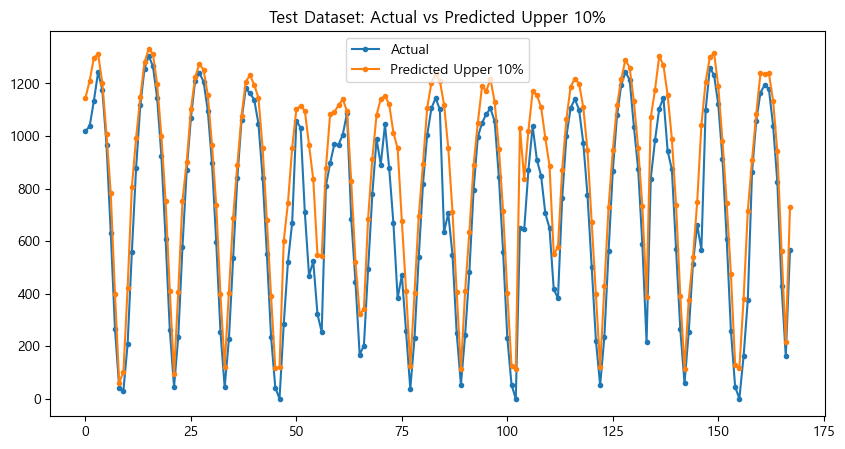

In [146]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_upper[:168], label='Predicted Upper 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Upper 10%')
plt.show()


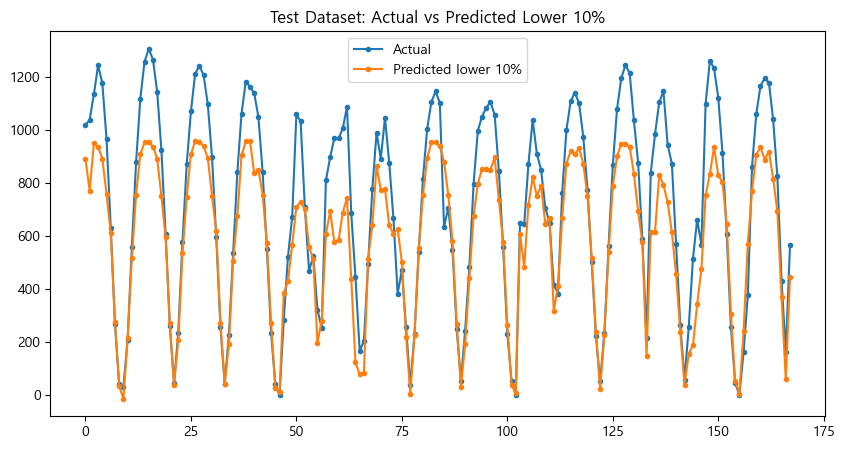

In [147]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_lower[:168], label='Predicted lower 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Lower 10%')
plt.show()

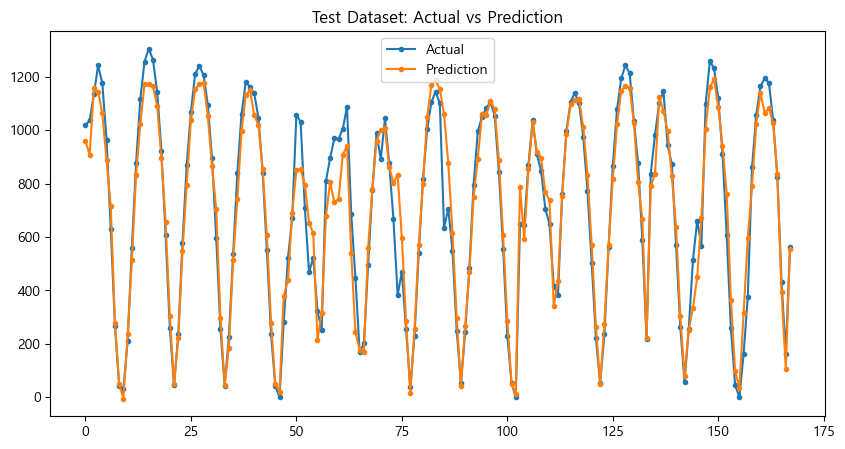

In [148]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred[:168], label='Prediction', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Prediction')
plt.show()

## 클러스터1

In [151]:
cluster1 = cluster1.reset_index(drop=True)

In [152]:
cluster1

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
0,2013-01-01 06:00:00,-2.2,0.000000,4.5,95.0,1018.7,0.0,0.00,6.2,10.0,6.0,10.000000,1500.0,0.00,26.0,23.000000,0.007,0.006,0.004,2013,1.000000,6.123234e-17,5.000000e-01,0.866025,1
1,2013-01-01 07:00:00,-1.7,0.000000,5.0,95.0,1018.6,0.0,0.00,6.2,10.0,6.0,10.000000,1500.0,0.00,26.0,20.586375,0.006,0.010,0.004,2013,0.965926,-2.588190e-01,5.000000e-01,0.866025,1
2,2013-01-01 08:00:00,-0.4,0.000000,3.2,89.0,1018.9,0.0,0.00,6.2,10.0,7.0,9.000000,1500.0,0.00,30.0,24.000000,0.006,0.011,0.004,2013,0.866025,-5.000000e-01,5.000000e-01,0.866025,1
3,2013-01-01 09:00:00,2.6,0.000000,6.0,91.0,1019.6,0.0,0.03,4.9,10.0,7.0,8.000000,1300.0,20.16,28.0,23.000000,0.005,0.010,0.004,2013,0.707107,-7.071068e-01,5.000000e-01,0.866025,1
4,2013-01-01 10:00:00,4.2,0.033333,5.8,82.0,1019.9,0.7,0.57,3.7,7.0,7.0,9.000000,1300.0,106.80,29.0,27.000000,0.007,0.006,0.005,2013,0.500000,-8.660254e-01,5.000000e-01,0.866025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17104,2022-12-31 09:00:00,0.1,0.200000,0.9,85.0,1033.4,0.7,0.37,0.0,0.0,0.0,10.000000,1295.0,51.72,32.0,29.000000,0.004,0.023,0.002,2022,0.707107,-7.071068e-01,-2.449294e-16,1.000000,1
17105,2022-12-31 10:00:00,1.7,0.200000,0.4,75.0,1033.7,1.0,1.04,0.0,0.0,0.0,10.000000,1534.0,344.04,45.0,34.000000,0.014,0.018,0.002,2022,0.500000,-8.660254e-01,-2.449294e-16,1.000000,1
17106,2022-12-31 18:00:00,3.7,0.200000,2.8,57.0,1031.1,0.3,0.05,0.0,0.0,0.0,12.555556,3775.0,5.76,32.0,19.000000,0.029,0.018,0.002,2022,-1.000000,-1.836970e-16,-2.449294e-16,1.000000,1
17107,2022-12-31 19:00:00,3.2,0.200000,2.3,60.0,1031.8,0.0,0.00,0.0,0.0,0.0,12.444444,3669.0,0.00,29.0,16.000000,0.027,0.016,0.003,2022,-0.965926,2.588190e-01,-2.449294e-16,1.000000,1


In [153]:
test_data = cluster1[13600:]
data = cluster1[:13600]

In [155]:
data = data.drop(columns=["날짜"])

# 타겟 변수를 분리합니다.
target = '발전량'
features = data.columns.drop(target)

X = data[features]
y = data[target]

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 이상치 탐지를 위해 Isolation Forest를 사용합니다.
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_scaled)

# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask], y[mask]

# 데이터를 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링 적용
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 상위 10%와 하위 10%에 대한 분위수 예측 모델을 각각 생성
model_upper = GradientBoostingRegressor(loss='quantile', alpha=0.9, random_state=42)
model_lower = GradientBoostingRegressor(loss='quantile', alpha=0.1, random_state=42)
model = GradientBoostingRegressor(loss='ls', random_state=42)


# 모델 학습
model_upper.fit(X_train_scaled, y_train)
model_lower.fit(X_train_scaled, y_train)
model.fit(X_train_scaled, y_train)

# 예측
train_pred_upper = model_upper.predict(X_train_scaled)
train_pred_lower = model_lower.predict(X_train_scaled)
train_pred = model.predict(X_train_scaled)

val_pred_upper = model_upper.predict(X_val_scaled)
val_pred_lower = model_lower.predict(X_val_scaled)
val_pred = model.predict(X_val_scaled)

# 성능 평가(MAE, RMSE)
train_mae_upper = mean_absolute_error(y_train, train_pred_upper)
train_rmse_upper = mean_squared_error(y_train, train_pred_upper, squared=False)

train_mae_lower = mean_absolute_error(y_train, train_pred_lower)
train_rmse_lower = mean_squared_error(y_train, train_pred_lower, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)

val_mae_upper = mean_absolute_error(y_val, val_pred_upper)
val_rmse_upper = mean_squared_error(y_val, val_pred_upper, squared=False)

val_mae_lower = mean_absolute_error(y_val, val_pred_lower)
val_rmse_lower = mean_squared_error(y_val, val_pred_lower, squared=False)

val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = mean_squared_error(y_val, val_pred, squared=False)

train_mae_upper, train_rmse_upper, train_mae_lower, train_rmse_lower, val_mae_upper, val_rmse_upper, val_mae_lower, val_rmse_lower


(52.36880078893746,
 103.49463616236321,
 54.576920200782816,
 122.76896218175028,
 51.45322944941239,
 102.9153538811777,
 54.39887756509105,
 123.343119174603)

In [156]:
print("train & val에 대한 성능 : ")
print()
print("정상")
print("train_mae_upper : ",train_mae)
print("train_rmse_upper : ",train_rmse)
print("val_mae_upper : ",val_mae)
print("val_rmse_upper : ",val_rmse)
print()
print("상위")
print("train_mae_upper : ",train_mae_upper)
print("train_rmse_upper : ",train_rmse_upper)
print("val_mae_upper : ",val_mae_upper)
print("val_rmse_upper : ",val_rmse_upper)
print()
print("하위")
print("train_mae_lower : ",train_mae_lower)
print("train_rmse_lower : ",train_rmse_lower)
print("val_mae_lower : ",val_mae_lower)
print("val_rmse_lower : ",val_rmse_lower)

train & val에 대한 성능 : 

정상
train_mae_upper :  28.201471562225535
train_rmse_upper :  61.04872022060236
val_mae_upper :  29.799389320797584
val_rmse_upper :  67.32016856930126

상위
train_mae_upper :  52.36880078893746
train_rmse_upper :  103.49463616236321
val_mae_upper :  51.45322944941239
val_rmse_upper :  102.9153538811777

하위
train_mae_lower :  54.576920200782816
train_rmse_lower :  122.76896218175028
val_mae_lower :  54.39887756509105
val_rmse_lower :  123.343119174603


In [158]:
test_data = test_data.drop(columns=["날짜"])

# 데이터에서 타겟 변수를 분리합니다.
target = '발전량'
features = test_data.columns.drop(target)

# 테스트 데이터셋에서 타겟 변수를 분리합니다.
X_test = test_data[features]
y_test = test_data[target]

# 특성 스케일링: scaler는 학습 데이터셋에 fit_transform이 적용된 상태여야 합니다.
X_test_scaled = scaler.transform(X_test)

# 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행합니다.
# model_upper와 model_lower는 각각 학습 데이터셋에 fit이 적용된 상태여야 합니다.
test_pred_upper = model_upper.predict(X_test_scaled)
test_pred_lower = model_lower.predict(X_test_scaled)
test_pred = model.predict(X_test_scaled)

# 성능 평가(MAE, RMSE)
test_mae_upper = mean_absolute_error(y_test, test_pred_upper)
test_rmse_upper = mean_squared_error(y_test, test_pred_upper, squared=False)

test_mae_lower = mean_absolute_error(y_test, test_pred_lower)
test_rmse_lower = mean_squared_error(y_test, test_pred_lower, squared=False)

test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = mean_absolute_error(y_test, test_pred)

print("테스트 데이터셋에 대한 성능:")
print(f"기본 회귀 예측: MAE = {test_mae:.2f}, RMSE = {test_rmse:.2f}")
print(f"상위 10% 예측: MAE = {test_mae_upper:.2f}, RMSE = {test_rmse_upper:.2f}")
print(f"하위 10% 예측: MAE = {test_mae_lower:.2f}, RMSE = {test_rmse_lower:.2f}")


테스트 데이터셋에 대한 성능:
기본 회귀 예측: MAE = 35.65, RMSE = 35.65
상위 10% 예측: MAE = 60.94, RMSE = 130.89
하위 10% 예측: MAE = 46.95, RMSE = 106.84


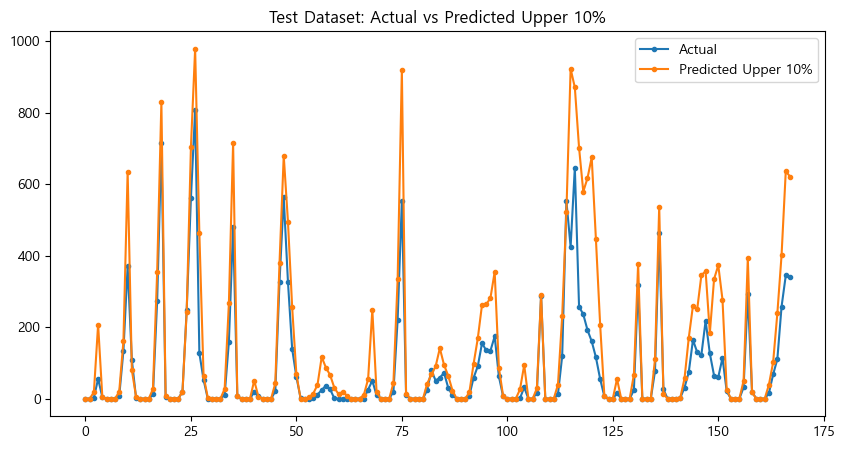

In [159]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_upper[:168], label='Predicted Upper 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Upper 10%')
plt.show()


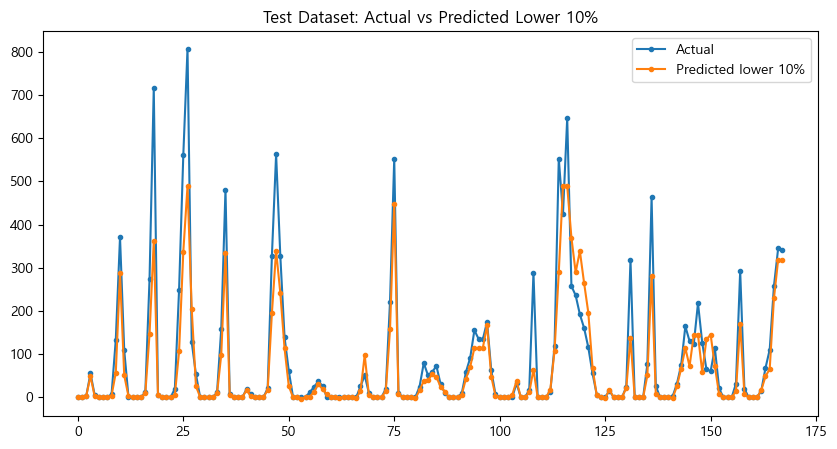

In [160]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_lower[:168], label='Predicted lower 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Lower 10%')
plt.show()

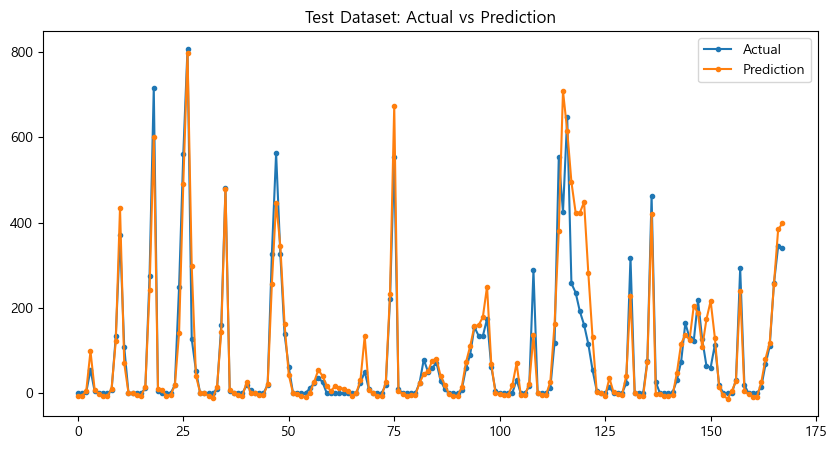

In [161]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred[:168], label='Prediction', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Prediction')
plt.show()

## 클러스터2

In [162]:
cluster2 = cluster2.reset_index(drop=True)

In [163]:
cluster2

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),발전량,PM10,PM2.5,O3,이산화질소,아황산가스,년,시간_sin,시간_cos,월_sin,월_cos,cluster
0,2013-02-01 06:00:00,11.8,4.900000,4.1,99.0,1019.4,0.0,0.00,0.0,10.0,7.0,8.0,500.0,0.00,11.0,11.0,0.051,0.006,0.004,2013,1.000000,6.123234e-17,8.660254e-01,0.5,2
1,2013-02-01 07:00:00,12.0,6.866667,4.6,99.0,1019.0,0.0,0.00,0.0,10.0,7.0,8.0,500.0,0.00,11.0,10.0,0.050,0.005,0.004,2013,0.965926,-2.588190e-01,8.660254e-01,0.5,2
2,2013-02-01 08:00:00,12.7,8.833333,5.2,99.0,1018.9,0.0,0.00,0.0,10.0,7.0,8.0,900.0,0.00,10.0,9.0,0.045,0.009,0.004,2013,0.866025,-5.000000e-01,8.660254e-01,0.5,2
3,2013-02-01 09:00:00,13.4,10.800000,7.7,99.0,1018.3,0.0,0.06,0.0,10.0,7.0,8.0,1100.0,0.48,10.0,8.0,0.036,0.012,0.007,2013,0.707107,-7.071068e-01,8.660254e-01,0.5,2
4,2013-02-01 10:00:00,13.2,8.400000,6.5,99.0,1018.0,0.0,0.12,0.0,10.0,7.0,8.0,800.0,19.92,18.0,14.0,0.034,0.017,0.004,2013,0.500000,-8.660254e-01,8.660254e-01,0.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17537,2022-12-23 15:00:00,-3.0,0.000000,9.7,84.0,1014.4,0.2,0.65,4.1,8.0,8.0,3.0,5000.0,124.32,13.0,12.0,0.034,0.005,0.001,2022,-0.707107,-7.071068e-01,-2.449294e-16,1.0,2
17538,2022-12-23 17:00:00,-3.4,0.000000,10.2,89.0,1015.5,0.3,0.30,4.2,8.0,8.0,2.0,3126.0,33.84,19.0,11.0,0.034,0.005,0.001,2022,-0.965926,-2.588190e-01,-2.449294e-16,1.0,2
17539,2022-12-23 18:00:00,-2.7,0.000000,8.7,80.0,1016.0,0.0,0.02,4.2,5.0,5.0,5.0,4986.0,0.00,19.0,10.0,0.035,0.004,0.001,2022,-1.000000,-1.836970e-16,-2.449294e-16,1.0,2
17540,2022-12-23 19:00:00,-2.2,0.000000,8.2,74.0,1016.7,0.0,0.00,4.2,8.0,8.0,4.0,2841.0,0.00,13.0,12.0,0.033,0.005,0.001,2022,-0.965926,2.588190e-01,-2.449294e-16,1.0,2


In [164]:
test_data = cluster2[13700:]
data = cluster2[:13700]

In [165]:
data = data.drop(columns=["날짜"])

# 타겟 변수를 분리합니다.
target = '발전량'
features = data.columns.drop(target)

X = data[features]
y = data[target]

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 이상치 탐지를 위해 Isolation Forest를 사용합니다.
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_scaled)

# select all rows that are not outliers
mask = yhat != -1
X, y = X[mask], y[mask]

# 데이터를 학습 데이터와 테스트 데이터로 분할합니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링 적용
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 상위 10%와 하위 10%에 대한 분위수 예측 모델을 각각 생성
model_upper = GradientBoostingRegressor(loss='quantile', alpha=0.9, random_state=42)
model_lower = GradientBoostingRegressor(loss='quantile', alpha=0.1, random_state=42)
model = GradientBoostingRegressor(loss='ls', random_state=42)


# 모델 학습
model_upper.fit(X_train_scaled, y_train)
model_lower.fit(X_train_scaled, y_train)
model.fit(X_train_scaled, y_train)

# 예측
train_pred_upper = model_upper.predict(X_train_scaled)
train_pred_lower = model_lower.predict(X_train_scaled)
train_pred = model.predict(X_train_scaled)

val_pred_upper = model_upper.predict(X_val_scaled)
val_pred_lower = model_lower.predict(X_val_scaled)
val_pred = model.predict(X_val_scaled)

# 성능 평가(MAE, RMSE)
train_mae_upper = mean_absolute_error(y_train, train_pred_upper)
train_rmse_upper = mean_squared_error(y_train, train_pred_upper, squared=False)

train_mae_lower = mean_absolute_error(y_train, train_pred_lower)
train_rmse_lower = mean_squared_error(y_train, train_pred_lower, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)

val_mae_upper = mean_absolute_error(y_val, val_pred_upper)
val_rmse_upper = mean_squared_error(y_val, val_pred_upper, squared=False)

val_mae_lower = mean_absolute_error(y_val, val_pred_lower)
val_rmse_lower = mean_squared_error(y_val, val_pred_lower, squared=False)

val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = mean_squared_error(y_val, val_pred, squared=False)

train_mae_upper, train_rmse_upper, train_mae_lower, train_rmse_lower, val_mae_upper, val_rmse_upper, val_mae_lower, val_rmse_lower


(84.11285638034906,
 132.45689383770093,
 79.35500600849899,
 144.21766909257477,
 86.48294539494974,
 135.02279295818812,
 80.11527190303721,
 145.3327572561596)

In [166]:
print("train & val에 대한 성능 : ")
print()
print("정상")
print("train_mae_upper : ",train_mae)
print("train_rmse_upper : ",train_rmse)
print("val_mae_upper : ",val_mae)
print("val_rmse_upper : ",val_rmse)
print()
print("상위")
print("train_mae_upper : ",train_mae_upper)
print("train_rmse_upper : ",train_rmse_upper)
print("val_mae_upper : ",val_mae_upper)
print("val_rmse_upper : ",val_rmse_upper)
print()
print("하위")
print("train_mae_lower : ",train_mae_lower)
print("train_rmse_lower : ",train_rmse_lower)
print("val_mae_lower : ",val_mae_lower)
print("val_rmse_lower : ",val_rmse_lower)

train & val에 대한 성능 : 

정상
train_mae_upper :  43.401218229721806
train_rmse_upper :  77.93030418228014
val_mae_upper :  46.51098279613172
val_rmse_upper :  84.58752689997091

상위
train_mae_upper :  84.11285638034906
train_rmse_upper :  132.45689383770093
val_mae_upper :  86.48294539494974
val_rmse_upper :  135.02279295818812

하위
train_mae_lower :  79.35500600849899
train_rmse_lower :  144.21766909257477
val_mae_lower :  80.11527190303721
val_rmse_lower :  145.3327572561596


In [167]:
test_data = test_data.drop(columns=["날짜"])

# 데이터에서 타겟 변수를 분리합니다.
target = '발전량'
features = test_data.columns.drop(target)

# 테스트 데이터셋에서 타겟 변수를 분리합니다.
X_test = test_data[features]
y_test = test_data[target]

# 특성 스케일링: scaler는 학습 데이터셋에 fit_transform이 적용된 상태여야 합니다.
X_test_scaled = scaler.transform(X_test)

# 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행합니다.
# model_upper와 model_lower는 각각 학습 데이터셋에 fit이 적용된 상태여야 합니다.
test_pred_upper = model_upper.predict(X_test_scaled)
test_pred_lower = model_lower.predict(X_test_scaled)
test_pred = model.predict(X_test_scaled)

# 성능 평가(MAE, RMSE)
test_mae_upper = mean_absolute_error(y_test, test_pred_upper)
test_rmse_upper = mean_squared_error(y_test, test_pred_upper, squared=False)

test_mae_lower = mean_absolute_error(y_test, test_pred_lower)
test_rmse_lower = mean_squared_error(y_test, test_pred_lower, squared=False)

test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = mean_absolute_error(y_test, test_pred)

print("테스트 데이터셋에 대한 성능:")
print(f"기본 회귀 예측: MAE = {test_mae:.2f}, RMSE = {test_rmse:.2f}")
print(f"상위 10% 예측: MAE = {test_mae_upper:.2f}, RMSE = {test_rmse_upper:.2f}")
print(f"하위 10% 예측: MAE = {test_mae_lower:.2f}, RMSE = {test_rmse_lower:.2f}")


테스트 데이터셋에 대한 성능:
기본 회귀 예측: MAE = 50.45, RMSE = 50.45
상위 10% 예측: MAE = 102.65, RMSE = 160.37
하위 10% 예측: MAE = 60.99, RMSE = 116.44


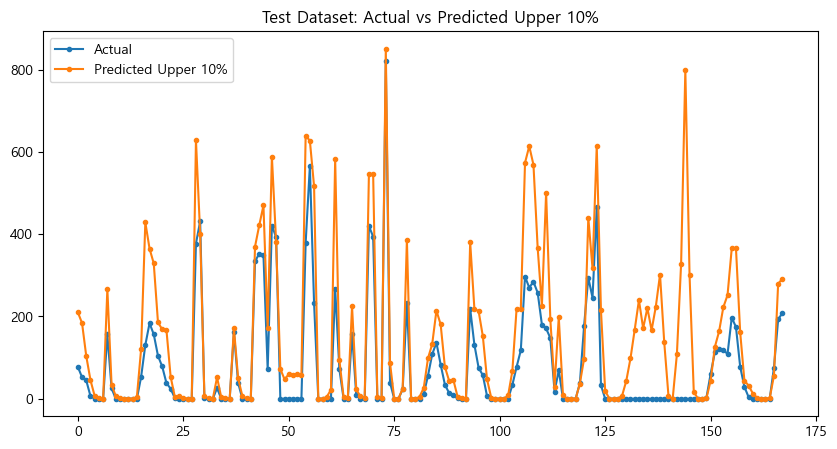

In [168]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_upper[:168], label='Predicted Upper 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Upper 10%')
plt.show()


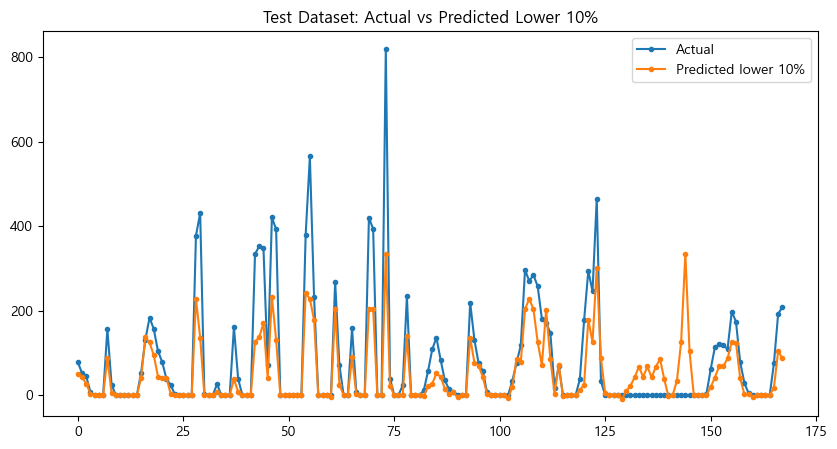

In [169]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred_lower[:168], label='Predicted lower 10%', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Predicted Lower 10%')
plt.show()

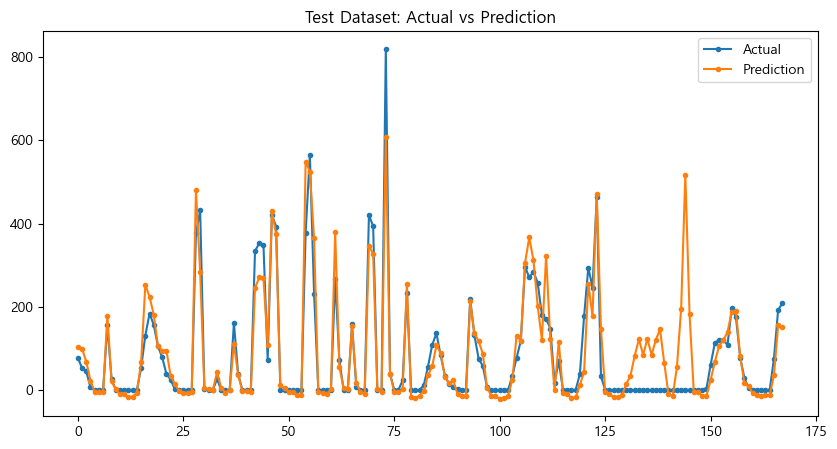

In [170]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:168], label='Actual', linestyle='-',marker='o',markersize=3)
plt.plot(test_pred[:168], label='Prediction', linestyle='-', marker='o',markersize=3)
plt.legend()
plt.title('Test Dataset: Actual vs Prediction')
plt.show()